# Program Definition

Develop a program to implement k-Nearest Neighbour algorithm to classify the randomly generated 100 values
of x in the range of [0,1]. Perform the following based on dataset generated.
1. Label the first 50 points {x1,……,x50} as follows: if (xi ≤ 0.5), then xi ε Class1, else xi ε Class2
2. Classify the remaining points, x51,……,x100 using KNN. Perform this for k=1,2,3,4,5,20,30

## Problem Explanation

The goal is to implement the k-Nearest Neighbors (KNN) algorithm to classify 100 randomly generated values in the range [0,1]. The classification process involves the following steps:

Generating the Dataset:

Create 100 random values in the range [0,1]
The first 50 values are manually labeled based on a given rule:
If 𝑥𝑖≤0.5 assign it to Class1.Otherwise, assign it to Class2.
Classifying the Remaining 50 Values Using KNN:

The next 50 values (𝑥51​  to 𝑥100) are unlabeled.
We use the KNN algorithm to classify these values based on their nearest neighbors among the first 50 labeled points.

Perform classification for k = 1, 2, 3, 4, 5, 20, 30.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Step 1: Generate 100 random values in the range [0,1]
x_values = np.random.rand(100)

# Step 2: Label the first 50 points
labels = np.array(["Class1" if x <= 0.5 else "Class2" for x in x_values[:50]])

print(x_values)
print("--------------------------------------")
print(labels)

[0.28122632 0.54015861 0.16277247 0.40228051 0.51182286 0.7282952
 0.46520924 0.51230085 0.0536128  0.94899626 0.52643321 0.66637103
 0.04821395 0.72477044 0.81466224 0.83519736 0.08844658 0.51917121
 0.0477772  0.31416355 0.74167704 0.04672157 0.35083989 0.09806394
 0.83086384 0.19864054 0.03107986 0.22659083 0.48691173 0.82933184
 0.77268605 0.92572254 0.29439149 0.38568047 0.02002523 0.38808222
 0.33865979 0.30814007 0.85470293 0.24141362 0.25322442 0.60491267
 0.19331605 0.88793174 0.97607136 0.8659023  0.29416541 0.48164166
 0.88660416 0.63326757 0.47162508 0.73685547 0.56325704 0.42572134
 0.61834347 0.71754338 0.83934507 0.35235231 0.59992649 0.87498927
 0.71234308 0.91994152 0.45072924 0.90881389 0.15861032 0.67571575
 0.05981596 0.9509609  0.44560814 0.99860861 0.30837447 0.06320028
 0.95979498 0.2784011  0.30850042 0.46138027 0.19783159 0.70746524
 0.7826471  0.62892644 0.64316139 0.78689179 0.0819854  0.25633183
 0.38054527 0.98782369 0.53397549 0.70397902 0.92335109 0.19026

In [2]:
# Step 3: Define the KNN function
def knn_classify(x_train, y_train, x_test, k):
    predictions = []
    
    for x in x_test:
        # Compute distances from x to all x_train points
        distances = np.abs(x_train - x)
        
        # Get indices of k nearest neighbors
        k_nearest_indices = np.argsort(distances)[:k]
        
        # Get the labels of k nearest neighbors
        k_nearest_labels = y_train[k_nearest_indices]
        
        # Determine the most common class among neighbors
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        
        # Store the predicted class
        predictions.append(most_common)
    
    return np.array(predictions)



<Figure size 1000x600 with 0 Axes>

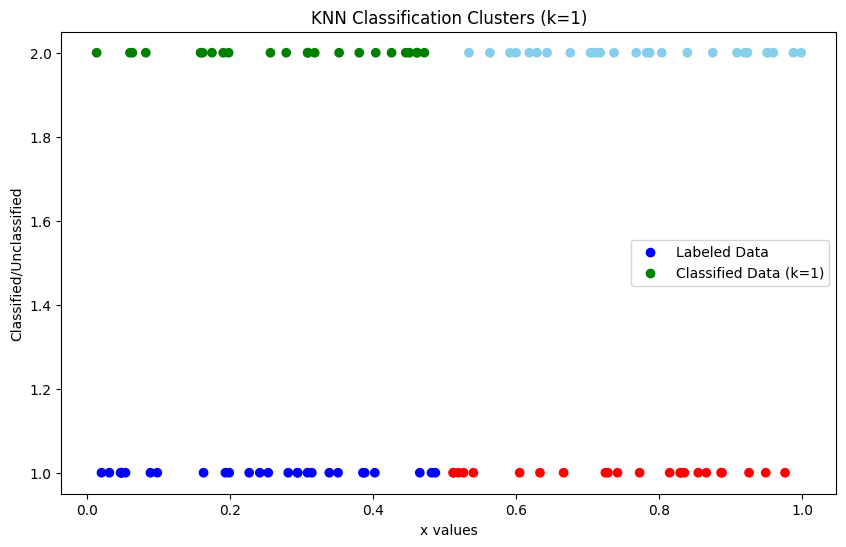

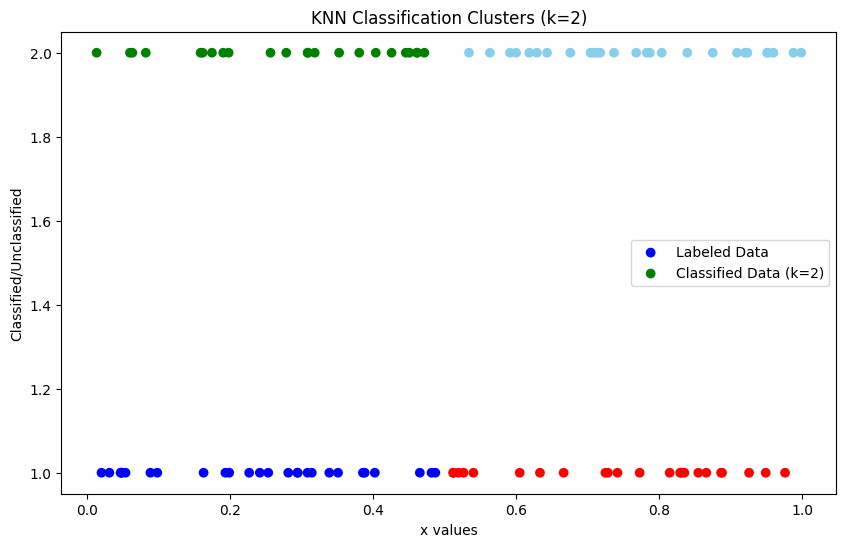

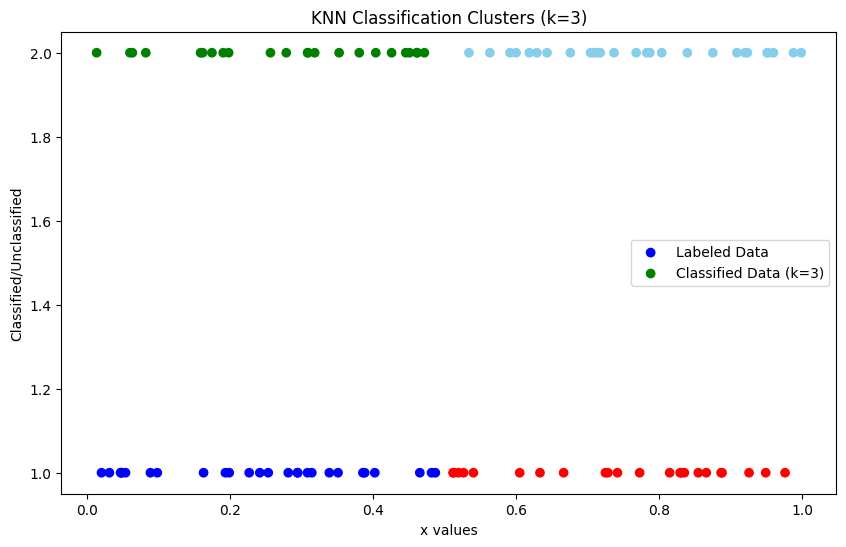

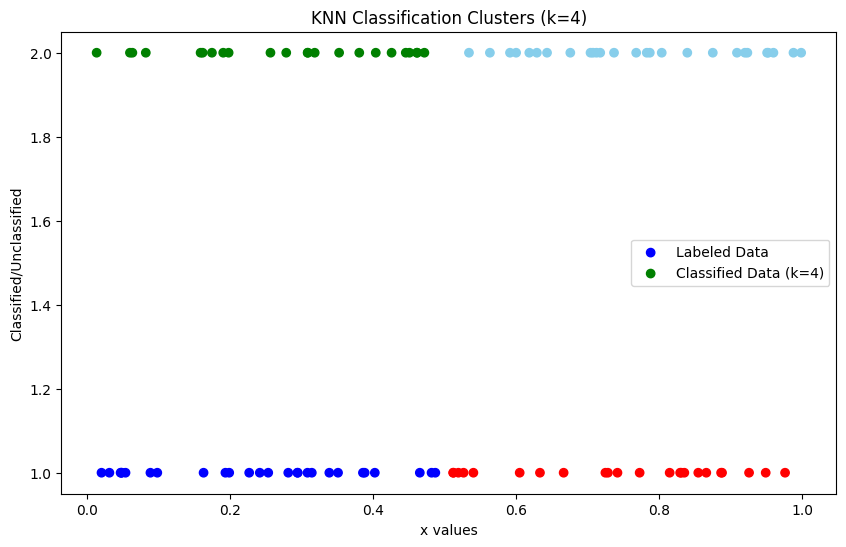

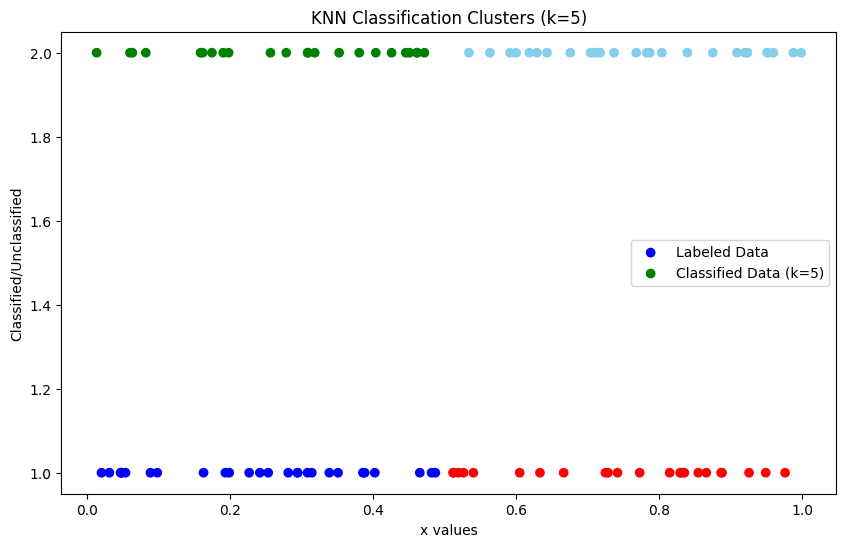

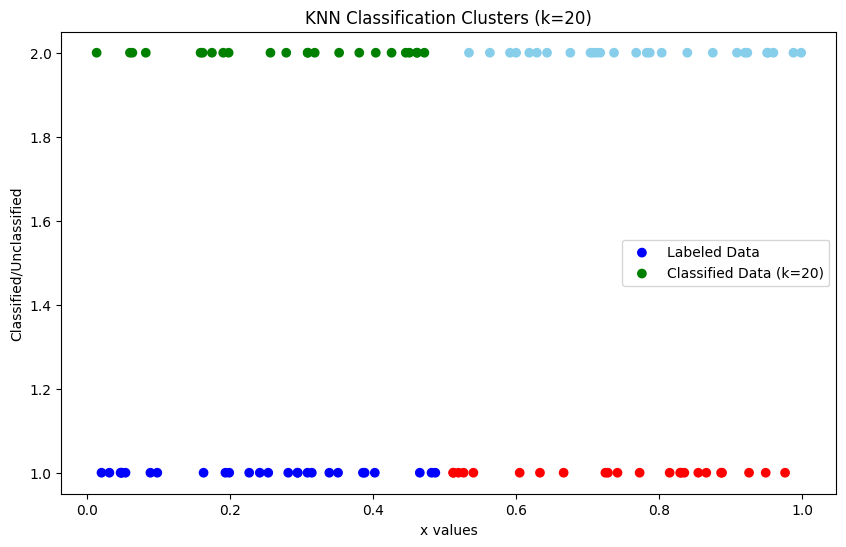

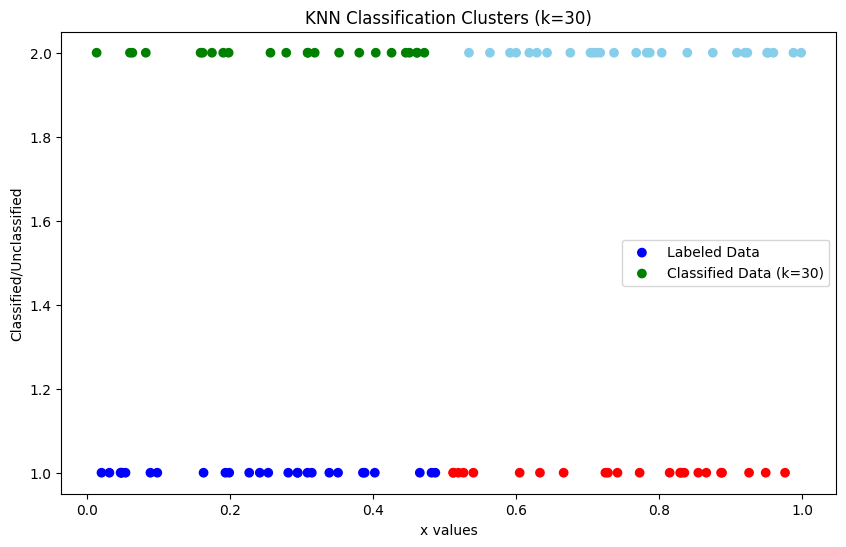

Results for k=1:
['Class1' 'Class2' 'Class2' 'Class1' 'Class2' 'Class2' 'Class2' 'Class1'
 'Class2' 'Class2' 'Class2' 'Class2' 'Class1' 'Class2' 'Class1' 'Class2'
 'Class1' 'Class2' 'Class1' 'Class2' 'Class1' 'Class1' 'Class2' 'Class1'
 'Class1' 'Class1' 'Class1' 'Class2' 'Class2' 'Class2' 'Class2' 'Class2'
 'Class1' 'Class1' 'Class1' 'Class2' 'Class2' 'Class2' 'Class2' 'Class1'
 'Class1' 'Class1' 'Class1' 'Class1' 'Class1' 'Class2' 'Class2' 'Class1'
 'Class2' 'Class2']
-
Results for k=2:
['Class1' 'Class2' 'Class2' 'Class1' 'Class2' 'Class2' 'Class2' 'Class1'
 'Class2' 'Class2' 'Class2' 'Class2' 'Class1' 'Class2' 'Class1' 'Class2'
 'Class1' 'Class2' 'Class1' 'Class2' 'Class1' 'Class1' 'Class2' 'Class1'
 'Class1' 'Class1' 'Class1' 'Class2' 'Class2' 'Class2' 'Class2' 'Class2'
 'Class1' 'Class1' 'Class1' 'Class2' 'Class2' 'Class2' 'Class2' 'Class1'
 'Class1' 'Class1' 'Class1' 'Class1' 'Class1' 'Class2' 'Class2' 'Class1'
 'Class2' 'Class2']
-
Results for k=3:
['Class1' 'Class2' 'Class2' '

In [3]:
# Step 4: Classify the remaining 50 points using KNN for different values of k
k_values = [1, 2, 3, 4, 5, 20, 30]
results = {}

for k in k_values:
    predicted_labels = knn_classify(x_values[:50], labels, x_values[50:], k)
    results[k] = predicted_labels

# Step 5: Visualization with clusters
plt.figure(figsize=(10, 6))
for k in k_values:
    plt.figure(figsize=(10, 6))
    
    # Plot labeled data
    plt.scatter(x_values[:50], [1]*50, c=["blue" if lbl == "Class1" else "red" for lbl in labels], label="Labeled Data")
    
    # Plot classified data
    plt.scatter(x_values[50:], [2]*50, c=["green" if lbl == "Class1" else "skyblue" for lbl in results[k]], label=f"Classified Data (k={k})")
    
    plt.xlabel("x values")
    plt.ylabel("Classified/Unclassified")
    plt.title(f"KNN Classification Clusters (k={k})")
    plt.legend()
    plt.show()

# Step 6: Print classification results
for k, preds in results.items():
    print(f"Results for k={k}:")
    print(preds)
    print("-")

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]